In [1]:
import numpy as np
from scipy.stats import poisson,binom,beta
from scipy.special import spence
import matplotlib.pyplot as plt
from matplotlib import rcParams,font_manager
import os
from matplotlib.ticker import FormatStrFormatter

%load_ext autoreload
%autoreload 2

In [2]:
rcParams['figure.figsize'] = (8,6) #figure size in inches
rcParams['font.family'] = "sans-serif" 
rcParams['font.weight'] = "roman" 
rcParams['font.style'] = "normal" # not 100% sure what this does but it was recommended
rcParams['font.size'] = 32 # not 100% sure what this does but it was recommended
rcParams['pdf.fonttype'] = 42
rcParams['axes.linewidth'] = 2 #thickness of the border
rcParams['xtick.major.width'] = rcParams['axes.linewidth'] # make sure line widths are consistent
rcParams['ytick.major.width'] = rcParams['axes.linewidth']
rcParams['axes.spines.right'] = False #hides right border
rcParams['axes.spines.top'] = False #hides top
rcParams['legend.frameon'] = False #hides box around the legend
rcParams['legend.fontsize'] = 18 #font size in pt
rcParams['axes.labelsize'] = 32 
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = rcParams['xtick.labelsize']
rcParams['lines.linewidth'] = 3
rcParams['xtick.major.size'] = 5
rcParams['ytick.major.size'] = rcParams['xtick.major.size'] 

#rcParams['font.sans-serif'] = "Helvetica Neue LT Std"
#rcParams['pdf.fonttype'] = 42
#rcParams['text.usetex'] = True
#prop = font_manager.FontProperties(fname='C:/Windows/Fonts/HelveticaNeueLTCom-Roman.ttf')
#rcParams['text.latex.preamble']=r'\usepackage{amsmath}\n\usepackage{amsfonts}'

In [3]:
Nsamples_fixed = [1,2,5,10,20,50,100]

fig_direc = 'C:/Users/Bas/Documents/Sourcetree repos/ibs/figures/'
fixed_color_list = ["#fee5d9","#fcbba1","#fc9272","#fb6a4a","#ef3b2c","#cb181d","#99000d"]
fixed_color_dict = {n:c for n,c in zip(Nsamples_fixed,fixed_color_list)}
fixed_color_dict.update({3: "#FCA78A", 15: "#F5533B",35: "#DD2A25"})
ibs_color = '#4392F1'
exact_color = 'green'
fixed_color = 'red'

In [4]:
m=np.arange(1000)

def compute_bias_mu(mu,Lest):
    return np.sum(poisson.pmf(m,mu)*Lest)-np.log(mu)

def compute_std_mu(mu,Lest):
    return np.sqrt(np.sum(poisson.pmf(m,mu)*Lest**2) - (np.sum(poisson.pmf(m,mu)*Lest))**2)

def compute_bias(p,M,Lest):
    return np.sum(binom.pmf(m,M,p)*Lest)-np.log(p)

def compute_std(p,M,Lest):
    return np.sqrt(np.sum(binom.pmf(m,M,p)*Lest**2)-np.sum(binom.pmf(m,M,p)*Lest)**2)

def compute_bias_IBS(p):
    return 0

def compute_std_IBS(p):
    return np.sqrt(spence(p))


In [5]:
all_mu = np.linspace(0.01,10,1000)
Lest = np.log(m+1)

bias_mu = np.array([compute_bias_mu(mu,Lest) for mu in all_mu])
std_mu = np.array([compute_std_mu(mu,Lest) for mu in all_mu])

In [6]:
all_p = np.linspace(0.001,1,1000)
bias_fixed_p = np.array([[compute_bias(p,M,np.log((m+1)/(M+1))) for p in all_p] for M in Nsamples_fixed])
std_fixed_p = np.array([[compute_std(p,M,np.log((m+1)/(M+1))) for p in all_p] for M in Nsamples_fixed])
all_p_mp = np.linspace(0.01,5,1000)
bias_fixed_mp = np.array([[compute_bias(p,M,np.log((m+1)/(M+1))) for p in all_p_mp/M] for M in Nsamples_fixed])
std_fixed_mp = np.array([[compute_std(p,M,np.log((m+1)/(M+1))) for p in all_p_mp/M] for M in Nsamples_fixed])

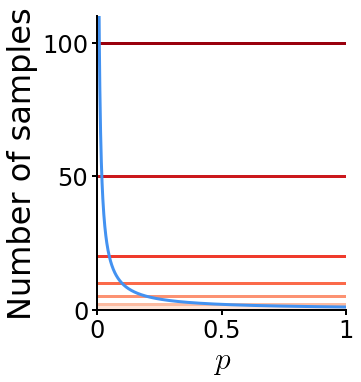

In [7]:
fig,ax=plt.subplots(figsize=(5.333,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

for i,M in enumerate(Nsamples_fixed):
    ax.plot(all_p,[M for p in all_p],color=fixed_color_list[i],label='Fixed sampling: ' + str(M))
#plt.plot(all_mu,bias_mu,color='black')
plt.plot(all_p,1/all_p,color=ibs_color,label='IBS')
ax.set_xlim([0,1])
ax.set_ylim([-0.1,110])
ax.set_xlabel(r'$p$',usetex=True)
ax.set_ylabel('Number of samples')
ax.set_yticks([0,50,100])
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.3)
#plt.text(0,0.9,'A',ha='right',va='top',transform=fig.transFigure)
fig.savefig(fig_direc + 'samples_p.pdf')
plt.show()

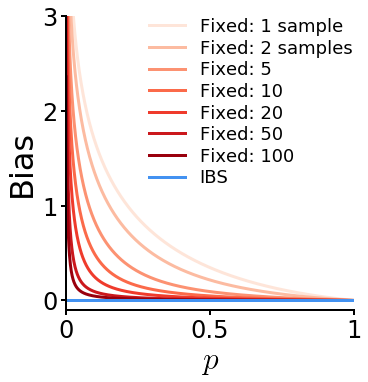

In [8]:
fig,ax=plt.subplots(figsize=(5.333,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

for i,M in enumerate(Nsamples_fixed):
    ax.plot(all_p,bias_fixed_p[i,:],color=fixed_color_list[i],
            label='Fixed: ' + str(M) + (' sample' if M==1 else (' samples' if M==2 else '')))
ax.plot(all_p,np.zeros_like(all_p),color=ibs_color,label='IBS')
ax.set_xlim([0,1])
ax.set_ylim([-0.1,3])
ax.set_yticks([0,1,2,3])
ax.set_xlabel(r'$p$',usetex=True)
ax.set_ylabel('Bias')
#fig.text(0,0.9,'B',ha='left')
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.2)
ax.legend(loc='upper right',labelspacing=0.2,bbox_to_anchor=(1.05, 1.05))
fig.savefig(fig_direc + 'bias_p.pdf')
plt.show()

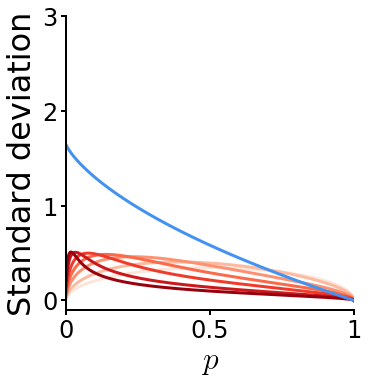

In [9]:
fig,ax=plt.subplots(figsize=(5.333,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

for i,M in enumerate(Nsamples_fixed):
    ax.plot(all_p,std_fixed_p[i,:],color=fixed_color_list[i],label='Fixed sampling: ' + str(M))
#plt.plot(all_mu,bias_mu,color='black')
plt.plot(all_p,spence(all_p),color=ibs_color,label='IBS')
ax.set_xlim([0,1])
ax.set_ylim([-0.1,3])
ax.set_yticks([0,1,2,3])
ax.set_xlabel(r'$p$',usetex=True)
#fig.text(0,0.9,'C',ha='left')
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.2)
ax.set_ylabel('Standard deviation')
fig.savefig(fig_direc + 'std_p.pdf')
plt.show()

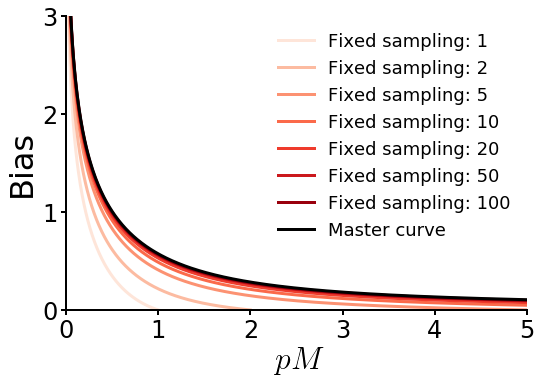

In [10]:
fig,ax=plt.subplots()
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

for i,M in enumerate(Nsamples_fixed):
    ax.plot(all_p_mp,bias_fixed_mp[i,:],color=fixed_color_list[i],label='Fixed sampling: ' + str(M))
plt.plot(all_mu,bias_mu,color='black',label='Master curve')
ax.set_xlim([0,5])
ax.set_ylim([0,3])
ax.set_yticks([0,1,2,3])
ax.set_xlabel(r'$pM$',usetex=True)
ax.set_ylabel('Bias')
#fig.text(0.05,0.9,'A',ha='left')
ax.legend(frameon=False)
#fig.tight_layout()
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.15)
fig.savefig(fig_direc + 'bias_pM.pdf')
plt.show()

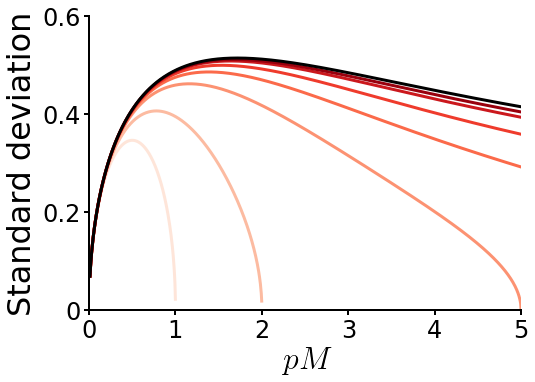

In [11]:
fig,ax=plt.subplots()
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

for i,M in enumerate(Nsamples_fixed):
    ax.plot(all_p_mp,std_fixed_mp[i,:],color=fixed_color_list[i],label='Fixed sampling: ' + str(M))
plt.plot(all_mu,std_mu,color='black',label='Master curve')
ax.set_xlim([0,5])
ax.set_ylim([0,0.6])
ax.set_yticks([0,0.2,0.4,0.6])
#fig.text(0,0.9,'B',ha='left')
ax.set_xlabel(r'$pM$',usetex=True)
ax.set_ylabel('Standard deviation')
#fig.tight_layout()
fig.subplots_adjust(bottom=0.2,right=0.95,left=0.2)
fig.savefig(fig_direc + 'std_pM.pdf')
plt.show()

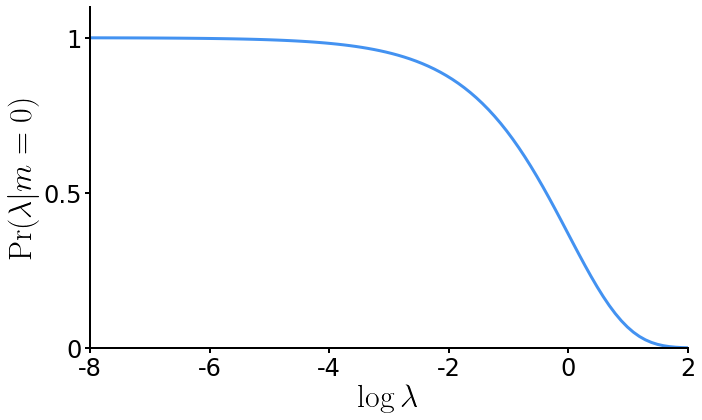

In [12]:
fig,ax=plt.subplots(figsize=(10,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
all_log_lambda=np.linspace(-8,2,100)
plt.plot(all_log_lambda,np.exp(-np.exp(all_log_lambda)),color=ibs_color)
ax.set_xlim([-8,2])
ax.set_ylim([0,1.1])
ax.set_yticks([0,0.5,1])
ax.set_xlabel(r'$\log\lambda$',usetex=True)
ax.set_ylabel(r'$\mathrm{Pr}(\lambda | m=0)$',usetex=True)
fig.subplots_adjust(bottom=0.16,right=0.95,left=0.12,top=0.95)
fig.savefig(fig_direc + 'likelihood_lambda.pdf')
plt.show()

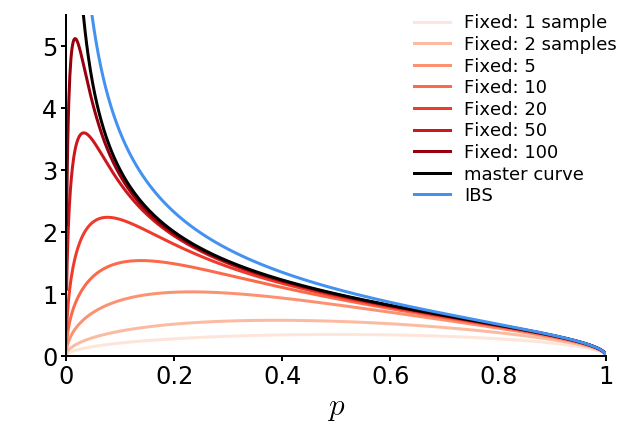

In [13]:
fig,ax=plt.subplots(figsize=(10,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

for i,M in enumerate(Nsamples_fixed):
    plt.plot(all_p,std_fixed_p[i,:]*np.sqrt(M),color=fixed_color_list[i],label='Fixed: ' + str(M) + (' sample' if M<3 else '') + ('s' if M==2 else ''))
plt.plot(all_p,np.sqrt((1-all_p)/all_p),color='black',label='master curve')
plt.plot(all_p,np.sqrt(spence(all_p)/all_p),color=ibs_color,label='IBS')
ax.set_xlim([0,1])
ax.set_ylim([0,5.5])
ax.set_xlabel(r'$p$',usetex=True)
ax.set_ylabel(' ')
ax.legend(labelspacing=0.2,bbox_to_anchor=(1.05, 1.05))
fig.subplots_adjust(bottom=0.16,right=0.95,left=0.2,top=0.95)
fig.savefig(fig_direc + 'std_scaled.pdf')
plt.show()

In [14]:
fig_direc

'C:/Users/Bas/Documents/Sourcetree repos/ibs/figures/'

bias_mp2 = np.array([[compute_bias(p,M,np.log(np.maximum(m,1)/M)) for p in all_p] for M in Nsamples_fixed])
std_mp2 = np.array([[compute_std(p,M,np.log(np.maximum(m,1)/M)) for p in all_p] for M in Nsamples_fixed])
bias_mp3 = np.array([[compute_bias(p,M,np.log((m+1)/(M+1))) for p in all_p] for M in Nsamples_fixed])
std_mp3 = np.array([[compute_std(p,M,np.log((m+1)/(M+1))) for p in all_p] for M in Nsamples_fixed])

fig,ax=plt.subplots()
for i,M in enumerate(Nsamples_fixed):
    plt.plot(all_p,std_mp3[i,:]*np.sqrt(M),color=fixed_color_list[i])
plt.plot(all_p,np.sqrt((1-all_p)/all_p),color='black')
plt.plot(all_p,np.sqrt(spence(all_p)/all_p),color=ibs_color)
ax.set_xlim([0,1])
ax.set_ylim([0,5])
ax.set_xlabel(r'$p$',usetex=True)
ax.set_ylabel(r'$\mathrm{Standard deviation}\times\sqrt{\mathrm{samples}}$',usetex=True)
fig.tight_layout()
plt.show()

fig,ax=plt.subplots()
for i,M in enumerate(Nsamples_fixed):
    plt.plot(all_p,std_mp3[i,:]*np.sqrt(M),color=fixed_color_list[i])
plt.plot(all_p,np.sqrt((1-all_p)/all_p),color='black')
plt.plot(all_p,np.sqrt(spence(all_p)/all_p),color=ibs_color)
ax.set_xlim([0,1])
ax.set_ylim([0,5])
ax.set_xlabel(r'$p$',usetex=True)
ax.set_ylabel(r'$\mathrm{Standard deviation}\times\sqrt{\mathrm{samples}}$',usetex=True)
fig.tight_layout()
plt.show()

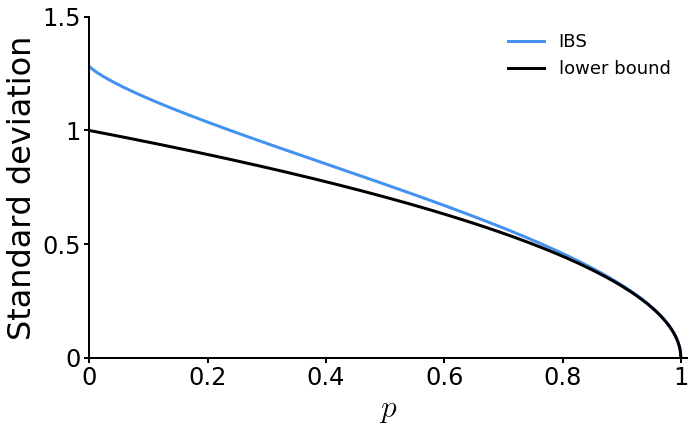

In [15]:
fig,ax=plt.subplots(figsize=(10,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

plt.plot(all_p,np.sqrt(spence(all_p)),color=ibs_color,label='IBS')
plt.plot(all_p,np.sqrt(1-all_p),color='black',label='lower bound')
ax.set_xlim([0,1.01])
ax.set_ylim([0,1.5])
ax.set_yticks([0,0.5,1,1.5])
ax.set_xlabel(r'$p$',usetex=True)
ax.set_ylabel('Standard deviation')
ax.legend()
fig.subplots_adjust(bottom=0.16,right=0.95,left=0.12,top=0.95)
fig.savefig(fig_direc + 'information_inequality.pdf')
plt.show()

In [16]:
def frac_improv(p,B=None):
    return np.mean(spence(p))*np.mean(1/p)/np.mean(np.sqrt(spence(p)/p))**2

def frac_improv2(p,B):
    Ropt =  B*np.sqrt(p*spence(p))/np.mean(np.sqrt(spence(p)/p))
    Bact = np.mean(np.ceil(Ropt)/p)
    Rconst = Bact/np.mean(1/p)
    return np.mean(spence(p)/Rconst)/np.mean(spence(p)/np.ceil(Ropt)),


x = [frac_improv2(np.random.uniform(size=500),100) for N in range(1000)]
print(np.percentile(x,25),np.percentile(x,50),np.percentile(x,75))

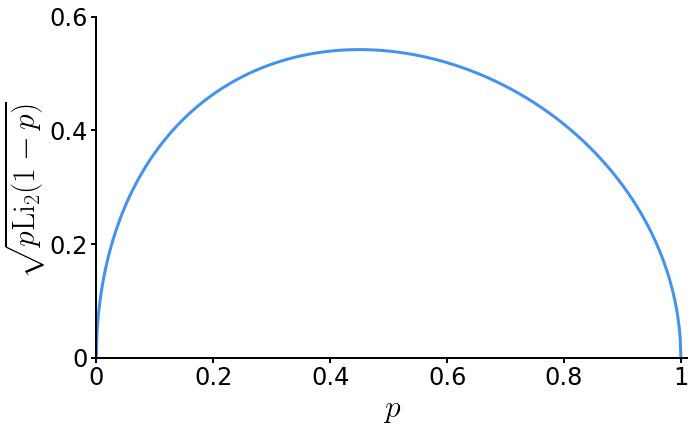

In [17]:
p = np.linspace(0,1,1000)
fig,ax=plt.subplots(figsize=(10,6))
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

plt.plot(p,np.sqrt(spence(p)*p),color=ibs_color)
ax.set_xlim([0,1.01])
ax.set_ylim([0,0.6])
ax.set_yticks([0,0.2,0.4,0.6])
ax.set_xlabel(r'$p$',usetex=True)
ax.set_ylabel(r'$\sqrt{p\mathrm{Li}_2(1-p)}$',usetex=True)
fig.subplots_adjust(bottom=0.16,right=0.95,left=0.13,top=0.95)
fig.savefig(fig_direc + 'repeats.pdf')
plt.show()

In [18]:
direc = 'C:/Users/Bas/Documents/Sourcetree repos/ibs/results/'

In [19]:
Npars = {'psycho': 120,'vstm' : 80,'fourinarow' : 120}
par_names = {'psycho' : ['log(sigma)','mu','lambda'], 'vstm' : ['log(sigma)','lambda'], 'fourinarow': ['theta','delta','log(sigma)']}
par_names_latex = {'psycho' : ['\eta','\mu','\gamma'], 
                   'vstm' : ['\eta','\gamma'], 
                   'fourinarow': ['\\xi','\delta','\eta']}
models = ['psycho','vstm','fourinarow']
methods = {'psycho' : ['ibs','fixed','fixedb','exact'], 'vstm': ['ibs','fixed','exact'], 'fourinarow' : ['ibs','fixed']}
Nsamples = {'psycho' :
            {'ibs' : [1,2,3,5,10,15,20,35,50],
             'fixed' : [1,2,3,5,10,15,20,35,50,100],
             'fixedb' : [1,2,3,5,10,15,20,35,50,100],
             'exact' : [0]
            },
            'vstm' : 
            {'ibs' : [1,2,3,5,10,20],
             'fixed' : [1,2,3,5,10,15,20,35,50,100],
             'exact' : [0]
            },
            'fourinarow' : 
            {'ibs' : [1,2,3],
             'fixed' : [1,2,3,5,10,15,20,35,50,100]
            }
           }

theta_real = {m : np.loadtxt(direc + '../matlab/theta_real_' + m + '.txt',delimiter=',') for m in models}
theta_real['vstm'][:,0] += np.log(180/np.pi)

In [20]:
def get_filename(model,method,filetype,Ns,i,direc,addendum=''):
    if method=='exact':
        return direc + model + '/exact/' + filetype + '_' + model + '_' + method + '_' + str(i) + '.txt'
    else:
        return direc + model + '/' + method + str(Ns) + addendum + '/' + filetype + '_' + model + '_' + method + '_' + str(i) + '.txt'

def load_nll_best(model,method,Ns,i,direc):
    fname = get_filename(model,method,'nll',Ns,i,direc)
    if os.path.isfile(fname):
        x = np.loadtxt(fname)
        if x.shape[0]==100:
            return x
        else:
            return np.vstack([x,np.full(shape=[100-x.shape[0],2],fill_value=np.nan)])
    else:
        return np.full(shape=[100,2],fill_value=np.nan)    
    
def load_theta(model,method,Ns,i,direc):
    fname = get_filename(model,method,'theta',Ns,i,direc)
    if os.path.isfile(fname):
        x = np.loadtxt(fname)
        if x.shape[0]==100:
            return x
        else:
            return np.vstack([x,np.full(shape=[100-x.shape[0],x.shape[1]],fill_value=np.nan)])
    else:
        return np.full(shape=[100,len(par_names[model])],fill_value=np.nan)
    
def load_samples(model,Ns,i,direc):
    fname = get_filename(model,'ibs','output',Ns,i,direc)
    if os.path.isfile(fname):
        x = np.loadtxt(fname)
        if x.shape[0]==100:
            return x[:,2]/x[:,4]
        else:
            return np.hstack([(x[:,2]/x[:,4]),np.full(shape=[100-x.shape[0]],fill_value=np.nan)])
    else:
        return np.full(shape=[100],fill_value=np.nan)    

In [21]:
theta = {model: { method: [[load_theta(model,method,Ns,i,direc) for i in range(1,Npars[model]+1)] for Ns in Nsamples[model][method]] 
                 for method in methods[model]}
         for model in models}

In [22]:
for method in methods['vstm']:
    for j,Ns in enumerate(Nsamples['vstm'][method]):
        for i in range(0,Npars['vstm']):
            theta['vstm'][method][j][i][:,0] += np.log(180/np.pi)

In [23]:
samples_used = {model: [[load_samples(model,Ns,i,direc) for i in range(1,Npars[model]+1)] for Ns in Nsamples[model]['ibs']]
                for model in models}

nll_best = {model: { method: [[load_nll_best(model,method,Ns,i,direc) for i in range(1,Npars[model]+1)] for Ns in Nsamples[model][method]] 
                 for method in methods[model]}
         for model in models}

In [24]:
def get_means(theta):
    return np.nanmean(np.array(theta),axis=2)

def get_stds(theta):
    return np.nanstd(np.array(theta),axis=2)
    
def get_absdevs(theta,theta_real):
    return np.nanmean(np.abs(np.array(theta)-theta_real[None,:,None,:]),axis=2)

def get_rmse_error(theta,theta_real):
    return np.array([[np.nanstd(np.sqrt(np.nanmean((np.array(t) - theta_real[:,None,:])[40*i:40*(i+1),:,i]**2,axis=0)))/np.sqrt(100)
                      for i in range(theta_real.shape[1])] for t in theta])


In [25]:
means = {model: { method: get_means(theta[model][method])
                 for method in methods[model]}
         for model in models}

stds = {model: { method: get_stds(theta[model][method])
                 for method in methods[model]}
         for model in models}

absdevs = {model: { method: get_absdevs(theta[model][method],theta_real[model])
                 for method in methods[model]}
         for model in models}

rmses = {model: { method: np.sqrt((means[model][method]-theta_real[model][None,:,:])**2 + stds[model][method]**2)
                 for method in methods[model]}
         for model in models}

rmse_errors = {model: { method: get_rmse_error(theta[model][method],theta_real[model])
                 for method in methods[model]}
         for model in models}

C:\Users\Bas\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':


In [26]:
def plot_rmses(model,i,filename,fig_label,**kwargs):
    
    pname = par_names_latex[model][i]
    
    fig,ax = plt.subplots(figsize=(5.333,6))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
    
    x = np.nanmean(np.array(samples_used[model])[:,40*i:40*(i+1),:],axis=(1,2))
    y = np.nanmean(rmses[model]['ibs'][:,40*i:40*(i+1),i],axis=1)
    yerr = rmse_errors[model]['ibs'][:,i]
    ax.errorbar(x=x,y=y,yerr=yerr,label='IBS',color=ibs_color)
    if 'use_fixedb' in kwargs and kwargs['use_fixedb']:
        x = Nsamples[model]['fixedb']
        y = np.nanmean(rmses[model]['fixedb'][:,40*i:40*(i+1),i],axis=1)
        yerr = rmse_errors[model]['fixedb'][:,i]
    else:
        x = Nsamples[model]['fixed']
        y = np.nanmean(rmses[model]['fixed'][:,40*i:40*(i+1),i],axis=1)
        yerr = rmse_errors[model]['fixed'][:,i]
    ax.errorbar(x=x,y=y,yerr=yerr,label='fixed',color=fixed_color)
    if 'yticks' in kwargs:
        ticks = kwargs['yticks']
        ax.set_yticks(ticks)

    if 'exact' in methods[model]:
        ax.axhline(np.nanmean(rmses[model]['exact'][:,40*i:40*(i+1),i]),color=exact_color,label='exact')
    ax.legend()
    ax.set_xlabel('Number of samples ')
    ax.set_ylabel('RMSE $(' + pname +')$',usetex=True)
    #fig.text(0,0.9,fig_label,ha='left')
    if 'ylim' in kwargs:
        ax.set_ylim(kwargs['ylim'])
    else:
        ax.set_ylim(ymin=0)
    
    fig.subplots_adjust(bottom=0.2,right=0.9,left=0.3)
    fig.savefig(fig_direc + filename)
    plt.show()

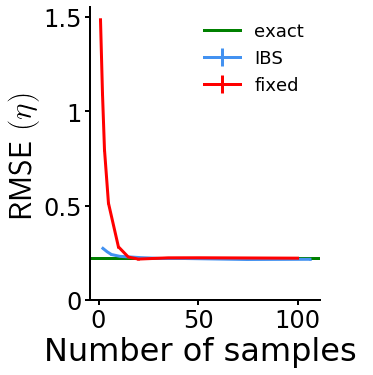

In [27]:
plot_rmses('psycho',0,'ori_results_C.pdf','C')

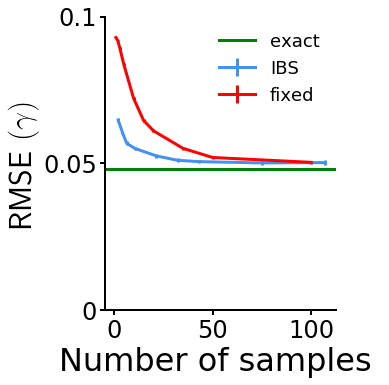

In [28]:
plot_rmses('psycho',2,'ori_results_F.pdf','F',yticks=[0,0.05,0.1])

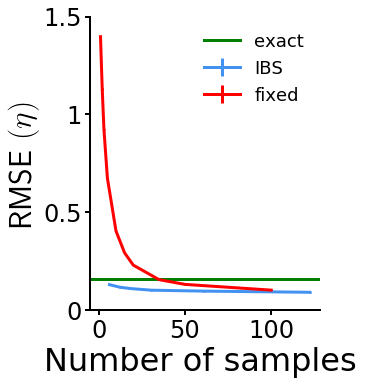

In [29]:
plot_rmses('vstm',0,'change_results_C.pdf','C',yticks=[0,0.5,1,1.5])

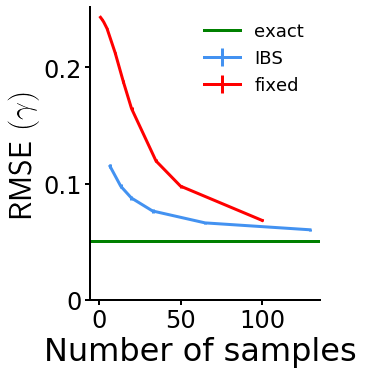

In [30]:
plot_rmses('vstm',1,'change_results_F.pdf','F',yticks=[0,0.1,0.2])

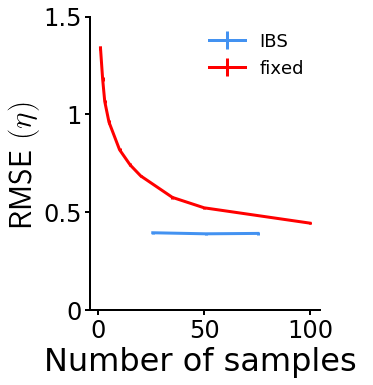

In [31]:
plot_rmses('fourinarow',2,'fourinarow_results_C.pdf','C',yticks=[0,0.5,1,1.5])

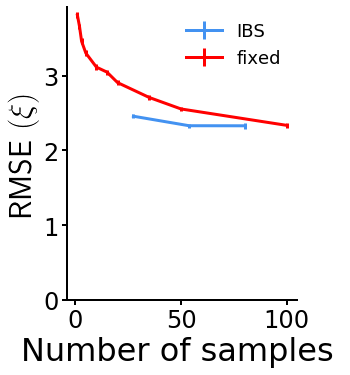

In [32]:
plot_rmses('fourinarow',0,'fourinarow_results_F.pdf','F')

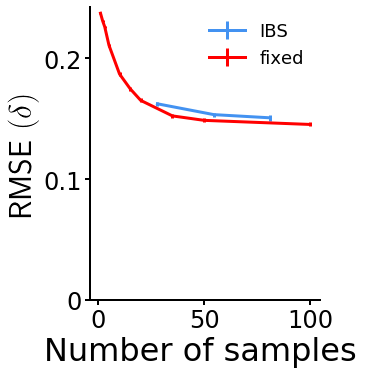

In [33]:
plot_rmses('fourinarow',1,'fourinarow_results_I.pdf','I',yticks=[0,0.1,0.2])

In [34]:
def plot_mean_and_std(model,i,x,filename,fig_label,**kwargs):
    k = len(methods[model])

    fig,ax = plt.subplots(figsize=(5.333,6))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

    pname = par_names_latex[model][i]
    ax.set_xlabel('$' + pname + '$',usetex=True)
    ax.set_ylabel('$\hat{' + pname + '}$',usetex=True,rotation=0,labelpad=20)
    if 'ticks' in kwargs:
        ticks = kwargs['ticks']
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)
    if 'xrange' in kwargs:
        ax.set_xlim(kwargs['xrange'])
        ax.plot(kwargs['xrange'],kwargs['xrange'],'-k')
    else:
        ax.plot(theta_real[model][40*i:40*(i+1),i],theta_real[model][40*i:40*(i+1),i],'-k')

    
    
    for k,(method,ns,c) in enumerate(x):
        j = np.nonzero(np.array(Nsamples[model][method])==ns)[0]
        if len(j)>0:
            j=j[0]
            label = ('fixed' if method=='fixedb' else method) + (' ' + str(ns) if method.startswith('fixed') else (' {:.2f}'.format(np.nanmean(samples_used[model][j][40*i:40*(i+1)])) 
                                                                     if method=='ibs' else ''))
            ax.errorbar(x = theta_real[model][40*i:40*(i+1),i],
                         y = means[model][method][j][40*i:40*(i+1),i],
                         yerr = stds[model][method][j][40*i:40*(i+1),i]*((np.arange(0,40)+k)%len(x)==0),
                        label = label,color=c)
        else:
            print('Not found:',model,method,ns)

    ax.legend()
    #fig.text(0,0.9,fig_label,ha='left')
    if 'leftmargin' in kwargs:
        fig.subplots_adjust(bottom=0.2,right=0.9,left=kwargs['leftmargin'])
    else:
        fig.subplots_adjust(bottom=0.2,right=0.9,left=0.2)
    fig.savefig(fig_direc + filename)
    plt.show()

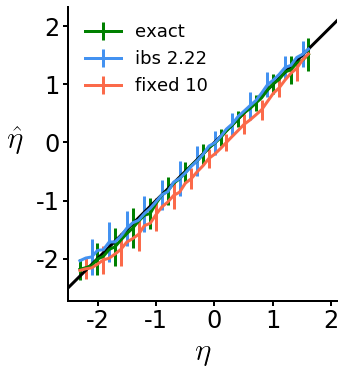

In [35]:
plot_mean_and_std('psycho',0,[['exact',0,'green'],['ibs',1,ibs_color],['fixed',10,fixed_color_dict[10]]],'ori_results_A.pdf','A',
                  ticks=[-2,-1,0,1,2],xrange=[-2.5,2.1])

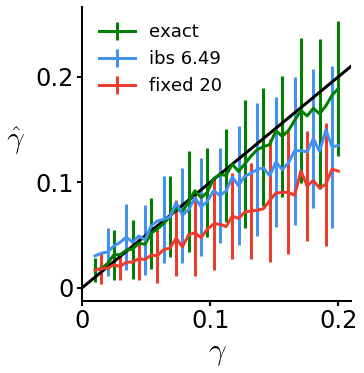

In [36]:
plot_mean_and_std('psycho',2,[['exact',0,'green'],['ibs',3,ibs_color],['fixed',20,fixed_color_dict[20]]],'ori_results_D.pdf',
                  'D',ticks=[0,0.1,0.2],xrange=[0,0.21])

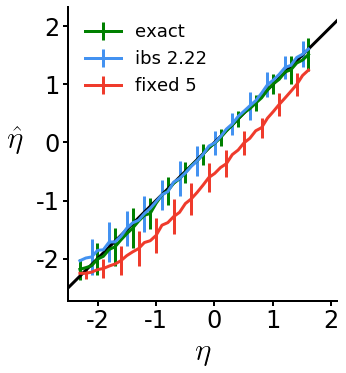

In [37]:
plot_mean_and_std('psycho',0,[['exact',0,'green'],['ibs',1,ibs_color],['fixed',5,fixed_color_dict[20]]],'test.pdf','A',
                  ticks=[-2,-1,0,1,2],xrange=[-2.5,2.1])

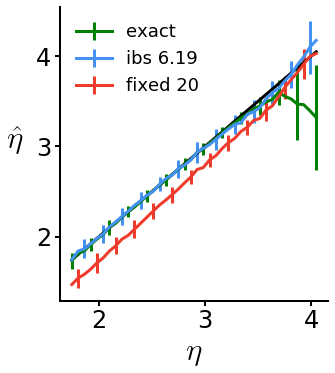

In [38]:
plot_mean_and_std('vstm',0,[['exact',0,'green'],['ibs',1,ibs_color],
                            ['fixed',20,fixed_color_dict[20]]],'change_results_A.pdf','A')

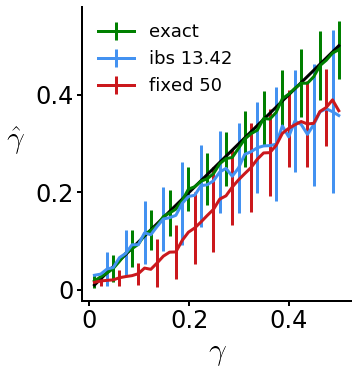

In [39]:
plot_mean_and_std('vstm',1,[['exact',0,'green'],['ibs',2,ibs_color],
                            ['fixed',50,fixed_color_dict[50]]],'change_results_D.pdf','D')

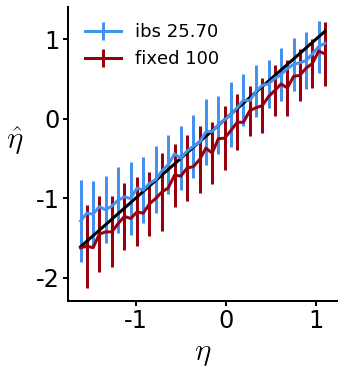

In [40]:
plot_mean_and_std('fourinarow',2,[['ibs',1,ibs_color],['fixed',100,fixed_color_dict[100]]],'fourinarow_results_A.pdf','A')

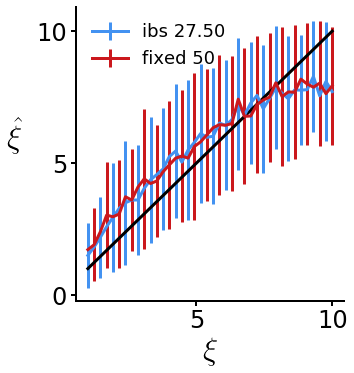

In [41]:
plot_mean_and_std('fourinarow',0,[['ibs',1,ibs_color],['fixed',50,fixed_color_dict[50]]],'fourinarow_results_D.pdf',
                  'D',ticks=[0,5,10])

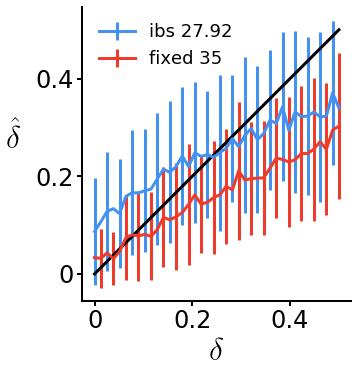

In [42]:
plot_mean_and_std('fourinarow',1,[['ibs',1,ibs_color],['fixed',35,fixed_color_dict[20]]],'fourinarow_results_G.pdf','G')

In [43]:
def plot_shades_around_true(model,i,filename,fig_label,**kwargs):
    fig,ax = plt.subplots(figsize=(5.333,6))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
    
    if not 'target' in kwargs:
        target = np.median(theta_real[model][:,i])
    else:
        target = kwargs['target']
    k = 40*i + np.argmin(np.abs(theta_real[model][40*i:40*(i+1),i] - target))
    
    if 'exact' in methods[model]:
        m = means[model]['exact'][0][k,i]
        s = stds[model]['exact'][0][k,i]/np.sqrt(100)
        ax.fill_between([0,max(Nsamples[model]['fixed'])],m-s,m+s,alpha=0.4,color=exact_color)
        ax.plot([0,max(Nsamples[model]['fixed'])],[m,m],label='exact',color=exact_color)
    m = means[model]['ibs'][:,k,i]
    s = stds[model]['ibs'][:,k,i]/np.sqrt(100)
    if len(m)>1:
        ax.fill_between(np.nanmean(np.array(samples_used[model])[:,40*i:40*(i+1),:],axis=(1,2)),m-s,m+s,alpha=0.4,color=ibs_color)
        ax.plot(np.nanmean(np.array(samples_used[model])[:,40*i:40*(i+1),:],axis=(1,2)),m,label='IBS',color=ibs_color)
    else:
        ax.plot(np.nanmean(np.array(samples_used[model])[:,40*i:40*(i+1),:],axis=(1,2)),m,'.',color=ibs_color,markersize=10,label='IBS')
        ax.errorbar(x=np.nanmean(np.array(samples_used[model])[:,40*i:40*(i+1),:],axis=(1,2)),y=m,yerr=s,color=ibs_color)
    if 'use_fixedb' in kwargs and kwargs['use_fixedb']:
        m = means[model]['fixedb'][:,k,i]
        s = stds[model]['fixedb'][:,k,i]/np.sqrt(100)
    else:
        m = means[model]['fixed'][:,k,i]
        s = stds[model]['fixed'][:,k,i]/np.sqrt(100)
    ax.fill_between(Nsamples[model]['fixed'],m-s,m+s,alpha=0.4,color=fixed_color)
    ax.plot(Nsamples[model]['fixed'],m,label='fixed',color=fixed_color)
    ax.axhline(theta_real[model][k,i],color='black',linestyle='dashed',label='true')
    pname = par_names_latex[model][i]
    ax.set_xlabel('Number of samples ')
    ax.set_ylabel('$\hat{' + pname + '}$',usetex=True,rotation=0,labelpad=20)
    if 'yticks' in kwargs:
        ticks = kwargs['yticks']
        ax.set_yticks(ticks)

    if not 'show_legend' in kwargs or kwargs['show_legend']:
        ax.legend()
    if 'yrange' in kwargs:
        ax.set_ylim(kwargs['yrange'])
    ax.set_xlim(0,max(Nsamples[model]['fixed']))
    #fig.text(0,0.9,fig_label,ha='left')
    if 'leftmargin' in kwargs:
        fig.subplots_adjust(bottom=0.2,right=0.9,left=kwargs['leftmargin'])
    else:
        fig.subplots_adjust(bottom=0.2,right=0.9,left=0.2)

    fig.savefig(fig_direc + filename)
    plt.show()

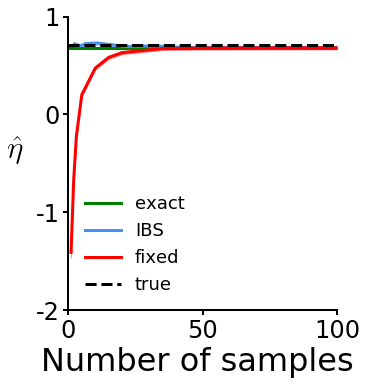

In [44]:
plot_shades_around_true('psycho',0,'ori_results_B.pdf','B',show_legend=True,yticks=[-2,-1,0,1])

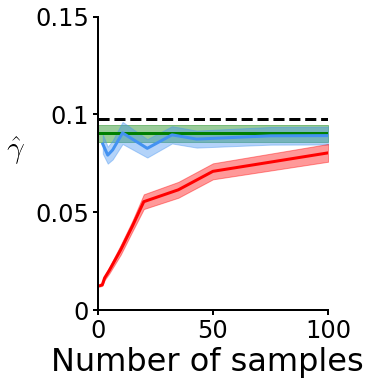

In [45]:
plot_shades_around_true('psycho',2,'ori_results_E.pdf','E',show_legend=False,yticks=[0,0.05,0.1,0.15],leftmargin=0.3)

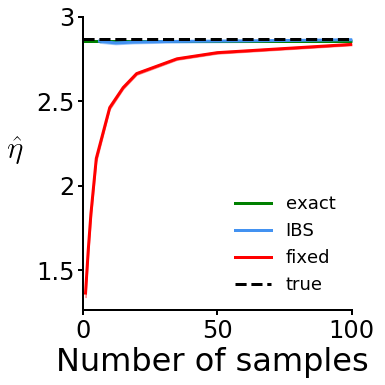

In [46]:
plot_shades_around_true('vstm',0,'change_results_B.pdf','B',yticks=[1.5,2,2.5,3])

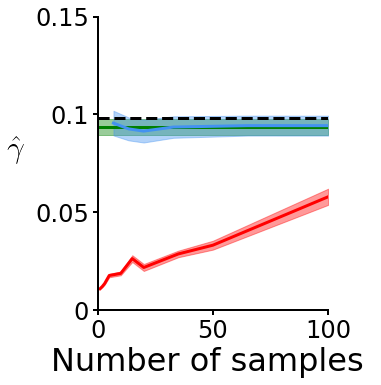

In [47]:
plot_shades_around_true('vstm',1,'change_results_E.pdf','E',target=0.1,yticks=[0,0.05,0.1,0.15],show_legend=False,leftmargin=0.3)

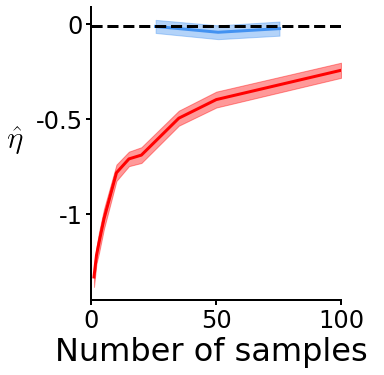

In [48]:
plot_shades_around_true('fourinarow',2,'fourinarow_results_B.pdf','B',show_legend=False,leftmargin=0.25)

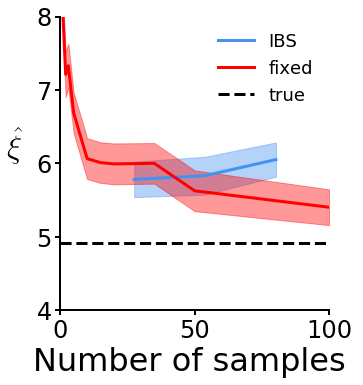

In [49]:
plot_shades_around_true('fourinarow',0,'fourinarow_results_E.pdf','E',yrange=[4,8])

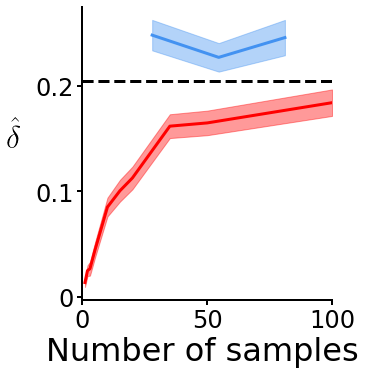

In [50]:
plot_shades_around_true('fourinarow',1,'fourinarow_results_H.pdf','H',show_legend=False,yticks=[0,0.1,0.2],leftmargin=0.25)

In [51]:
def get_ibs_color(n,nmax):
    ibs_color_rgb = np.array([int(ibs_color[i:i+2], 16) for i in [1, 3, 5]])
    ibs_color_scaled = tuple(((255-(1/2+1/2*n/nmax)*(255-ibs_color_rgb)).astype(int)))
    return '#%02x%02x%02x' % ibs_color_scaled

def plot_param_recovery(model,method,i,fig_label,**kwargs):
    pname = par_names_latex[model][i]
    if 'figsize' in kwargs:
        fig,ax = plt.subplots(figsize=kwargs['figsize'])
    else:
        fig,ax = plt.subplots(figsize=(5.333,6))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
    
    if method=='fixed':
        for j,Ns in enumerate(Nsamples[model][method]):
            ax.plot(theta_real[model][40*i:40*(i+1),i],means[model][method][j,40*i:40*(i+1),i],'.-',
                    color=(fixed_color_dict[Ns]),
                    label=str(Ns) + (' sample' if Ns<3 else '') + ('s' if Ns==2 else ''))
    elif method=='ibs':
        Nsmax = np.max(Nsamples[model][method])
        for j,Ns in enumerate(Nsamples[model][method]):
            ax.plot(theta_real[model][40*i:40*(i+1),i],means[model][method][j,40*i:40*(i+1),i],'.-',
                    color=get_ibs_color(Ns,Nsmax),
                    label='{:.2f}'.format(np.nanmean(samples_used[model][j][40*i:40*(i+1)])) + (' samples' if j==0 else ''))
    elif method=='exact':
        for j,Ns in enumerate(Nsamples[model][method]):
            ax.plot(theta_real[model][40*i:40*(i+1),i],means[model][method][j,40*i:40*(i+1),i],'.-',
                    color=exact_color,
                    label='exact')
    ax.plot(theta_real[model][40*i:40*(i+1),i],theta_real[model][40*i:40*(i+1),i],'-k')
    ax.set_xlabel('$' + pname + '$',usetex=True)
    ax.set_ylabel('$\hat{' + pname + '}$',usetex=True,rotation=0,labelpad=20)
    if 'ticks' in kwargs:
        ticks = kwargs['ticks']
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)
    if 'xrange' in kwargs:
        ax.set_xlim(kwargs['xrange'])
        ax.plot(kwargs['xrange'],kwargs['xrange'],'-k')
    else:
        ax.plot(theta_real[model][40*i:40*(i+1),i],theta_real[model][40*i:40*(i+1),i],'-k')
    if 'yrange' in kwargs:
        ax.set_ylim(kwargs['yrange'])
    if not 'show_legend' in kwargs or kwargs['show_legend']:
        ax.legend(loc='upper left',labelspacing=0.1,bbox_to_anchor=(-0.025, 1.1))
    if 'figsize' in kwargs:
        if 'leftmargin' in kwargs:
            fig.subplots_adjust(bottom=0.2,right=0.95,left=kwargs['leftmargin'])
        else:
            fig.subplots_adjust(bottom=0.2,right=0.95,left=0.15)
    else:
        if 'leftmargin' in kwargs:
            fig.subplots_adjust(bottom=0.2,right=0.9,left=kwargs['leftmargin'])
        else:
            fig.subplots_adjust(bottom=0.2,right=0.9,left=0.2)

        

    #fig.text(0,0.9,fig_label,ha='left')
    fig.savefig(fig_direc + 'param_recovery_' + model + '_' + method + '_'+ par_names[model][i] + '.pdf')
    plt.show()

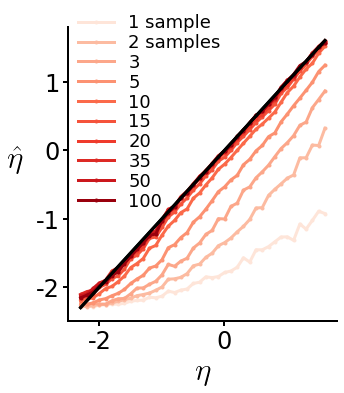

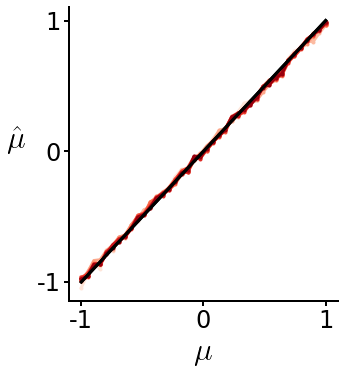

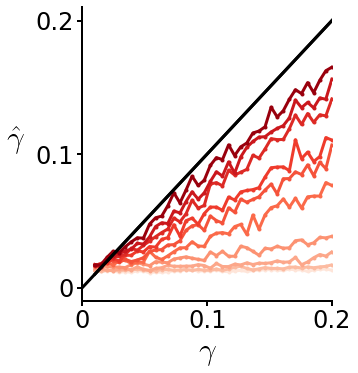

In [52]:
plot_param_recovery('psycho','fixed',0,'A')
plot_param_recovery('psycho','fixed',1,'D',show_legend=False,ticks=[-1,0,1])
plot_param_recovery('psycho','fixed',2,'F',show_legend=False,ticks=[0,0.1,0.2],xrange=[0,0.2],leftmargin=0.25)

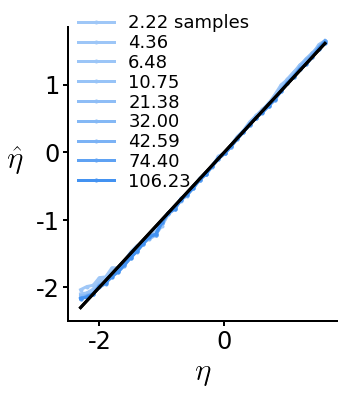

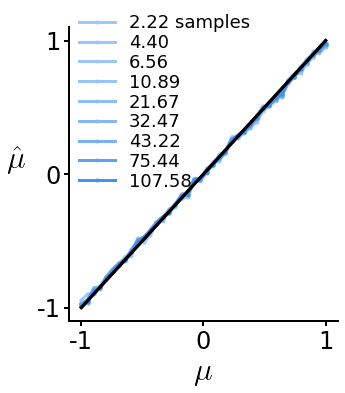

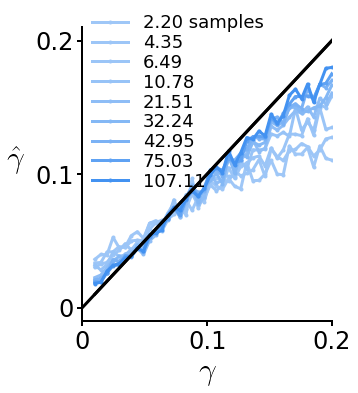

In [53]:
plot_param_recovery('psycho','ibs',0,'B')
plot_param_recovery('psycho','ibs',1,'E',ticks=[-1,0,1])
plot_param_recovery('psycho','ibs',2,'G',ticks=[0,0.1,0.2],xrange=[0,0.2],leftmargin=0.25)

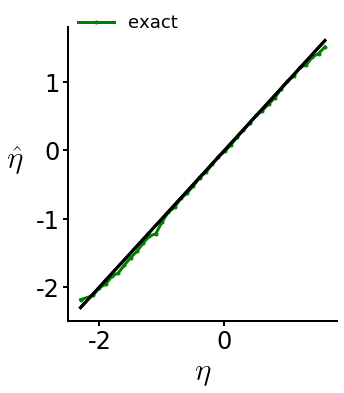

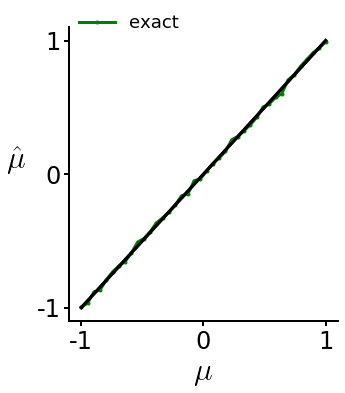

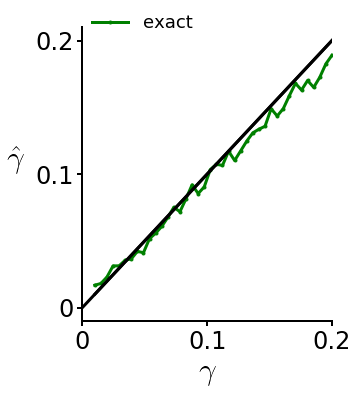

In [54]:
plot_param_recovery('psycho','exact',0,'C')
plot_param_recovery('psycho','exact',1,'F',ticks=[-1,0,1])
plot_param_recovery('psycho','exact',2,'I',ticks=[0,0.1,0.2],xrange=[0,0.2],leftmargin=0.25)

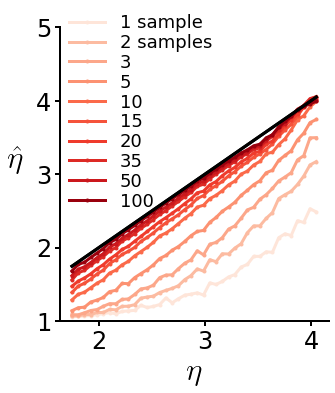

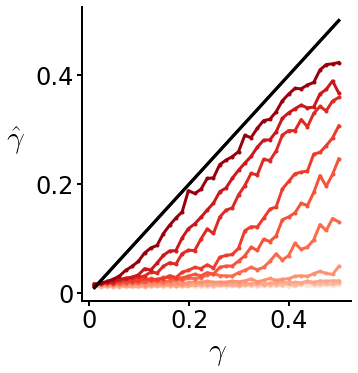

In [55]:
plot_param_recovery('vstm','fixed',0,'A',yrange=[1,5])
plot_param_recovery('vstm','fixed',1,'D',show_legend=False,ticks=[0,0.2,0.4])

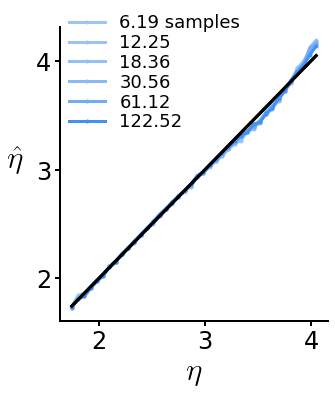

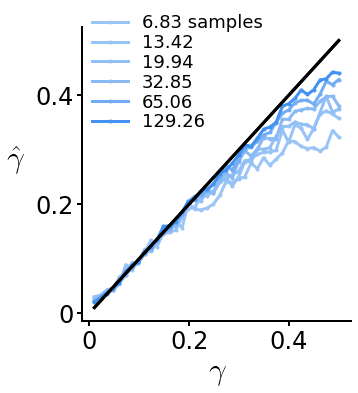

In [56]:
plot_param_recovery('vstm','ibs',0,'B',ticks=[2,3,4])
plot_param_recovery('vstm','ibs',1,'E',ticks=[0,0.2,0.4])

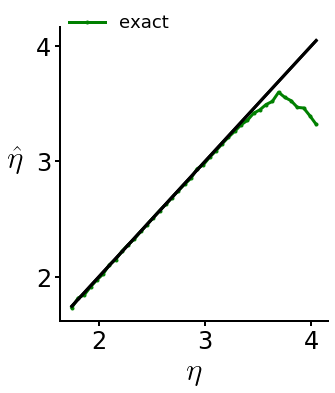

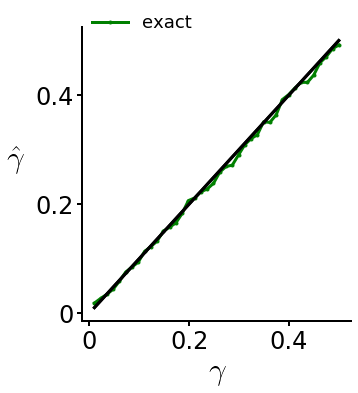

In [57]:
plot_param_recovery('vstm','exact',0,'C',ticks=[2,3,4])
plot_param_recovery('vstm','exact',1,'F',ticks=[0,0.2,0.4])

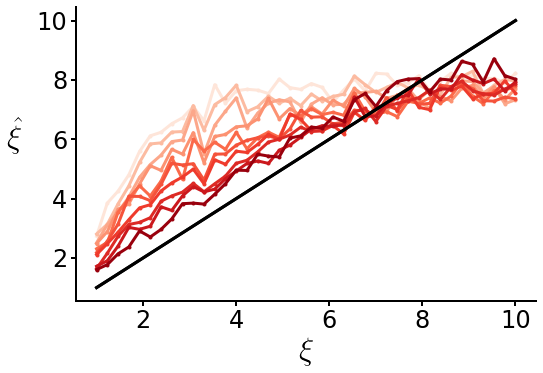

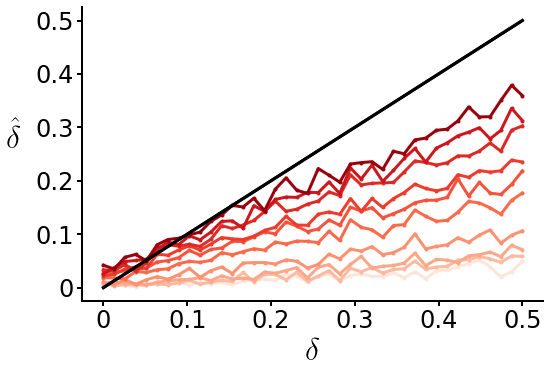

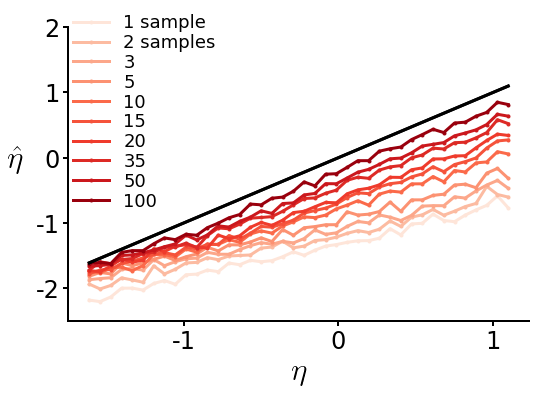

In [58]:
plot_param_recovery('fourinarow','fixed',0,'A',show_legend=False,figsize=(8,6))
plot_param_recovery('fourinarow','fixed',1,'C',show_legend=False,figsize=(8,6))
plot_param_recovery('fourinarow','fixed',2,'E',yrange=[-2.5,2],ticks=[-2,-1,0,1,2],figsize=(8,6))

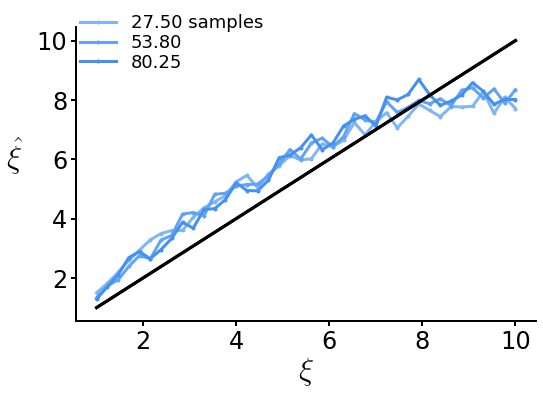

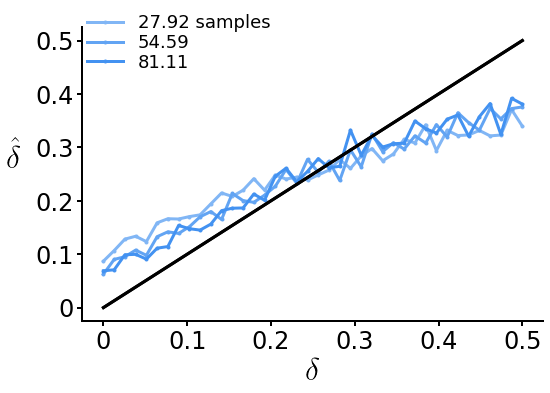

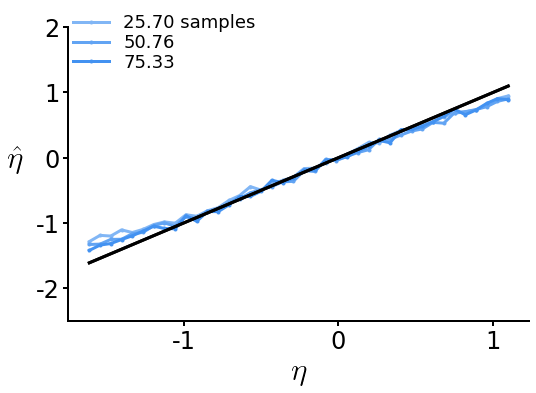

In [59]:
plot_param_recovery('fourinarow','ibs',0,'B',figsize=(8,6))
plot_param_recovery('fourinarow','ibs',1,'D',figsize=(8,6))
plot_param_recovery('fourinarow','ibs',2,'F',yrange=[-2.5,2],ticks=[-2,-1,0,1,2],figsize=(8,6))

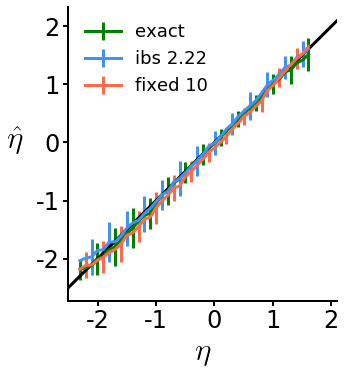

In [60]:
plot_mean_and_std('psycho',0,[['exact',0,'green'],['ibs',1,ibs_color],['fixedb',10,fixed_color_dict[10]]],
                  'psycho_results_fixedb_A.pdf','A',ticks=[-2,-1,0,1,2],xrange=[-2.5,2.1])

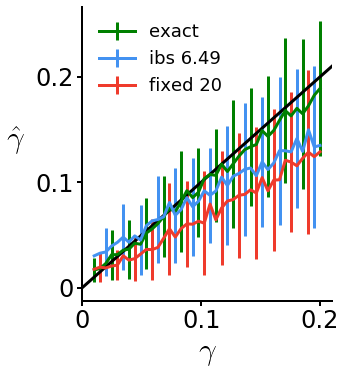

In [61]:
plot_mean_and_std('psycho',2,[['exact',0,'green'],['ibs',3,ibs_color],['fixedb',20,fixed_color_dict[20]]],
                  'psycho_results_fixedb_D.pdf','D',ticks=[0,0.1,0.2],xrange=[0,0.21],leftmargin=0.25)

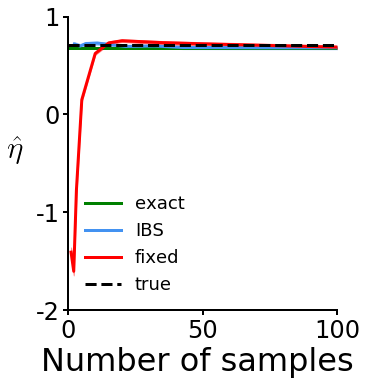

In [62]:
plot_shades_around_true('psycho',0,'psycho_results_fixedb_B.pdf','B',use_fixedb=True,yticks=[-2,-1,0,1],leftmargin=0.2)

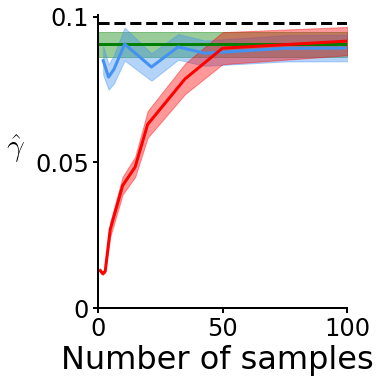

In [63]:
plot_shades_around_true('psycho',2,'psycho_results_fixedb_E.pdf','E',show_legend=False,use_fixedb=True,leftmargin=0.25,yticks=[0,0.05,0.1])

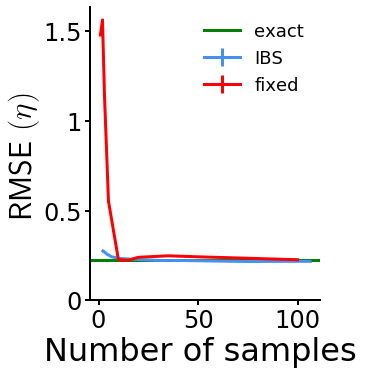

In [64]:
plot_rmses('psycho',0,'psycho_results_fixedb_C.pdf','C',use_fixedb=True)

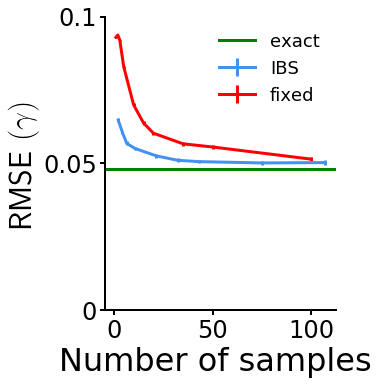

In [65]:
plot_rmses('psycho',2,'psycho_results_fixedb_F.pdf','F',use_fixedb=True,yticks=[0,0.05,0.1])

In [66]:
def plot_absdevs(model):
    for i,pname in enumerate(par_names[model]):
        fig,ax = plt.subplots()
        ax.plot(np.nanmean(np.array(samples_used[model])[:,40*i:40*(i+1),:],axis=(1,2)),
                np.nanmean(absdevs[model]['ibs'][:,40*i:40*(i+1),i],axis=1),'.-',label='IBS')
        ax.plot(Nsamples[model]['fixed'],np.nanmean(absdevs[model]['fixed'][:,40*i:40*(i+1),i],axis=1),'.-',label='fixed')
        if 'exact' in methods[model]:
            ax.axhline(np.nanmean(absdevs[model]['exact'][:,40*i:40*(i+1),i]),color='black')
        ax.set_xlabel('Samples used')
        ax.set_ylabel('mads(' + pname +')')
        ax.legend()
        fig.savefig(fig_direc + 'mads_' + model + '_' + pname + '.pdf')
        plt.show()
            
def plot_nll_best(model,i,x,save_plot=False):
    fig,ax = plt.subplots()    
        
    for k,(method,ns,c) in enumerate(x):
        j = np.nonzero(np.array(Nsamples[model][method])==ns)[0]
        if len(j)>0:
            j=j[0]
            L = np.array(nll_best[model][method][j][40*i:40*(i+1)])[:,:,0]
            L_exact = np.array(nll_best[model][method][j][40*i:40*(i+1)])[:,:,1]
            label = method + (' ' + str(ns) if method=='fixed' else (' {:.2f}'.format(np.nanmean(samples_used[model][j][40*i:40*(i+1)])) 
                                                                     if method=='ibs' else ''))
            ax.errorbar(x = theta_real[model][40*i:40*(i+1),i],y=np.mean(L_exact-L,axis=1),yerr=np.std(L_exact-L,axis=1)/np.sqrt(L.shape[1]),label = label,color = c )
        else:
            print('Not found:',model,method,ns)

    plt.axhline(0,color='black')
    pname = par_names[model][i]
    ax.set_xlabel(pname)
    ax.set_ylabel('Log-likelihood loss')
    ax.legend()
    if save_plot:
        fig.savefig(fig_direc + 'nll_best_'  + pname + '.pdf')
    plt.show()


In [67]:
def plot_loglik_loss(model,**kwargs):
    fig,ax = plt.subplots(figsize=(8,6))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
    
    m = -np.nanmean(np.array(np.diff(nll_best[model]['ibs'])),axis=(1,2))
    s = np.nanstd(np.array(np.diff(nll_best[model]['ibs'])),axis=(1,2))/np.sqrt(np.prod(np.array(np.diff(nll_best[model]['ibs'])).shape[1:3]))
    x = np.nanmean(np.nanmean(samples_used[model],axis=1),axis=1)
    ax.errorbar(x=x,y=m,yerr=s.flatten(),label='IBS',color=ibs_color)
    x = Nsamples[model]['fixed']
    m = -np.nanmean(np.array(np.diff(nll_best[model]['fixed'])),axis=(1,2))
    s = np.nanstd(np.array(np.diff(nll_best[model]['fixed'])),axis=(1,2))/np.sqrt(np.prod(np.array(np.diff(nll_best[model]['fixed'])).shape[1:3]))
    ax.errorbar(x=x,y=m,yerr=s.flatten(),label='fixed',color=fixed_color)
    #ax.plot([0,max(Nsamples[model]['fixed'])],[0,0],color=exact_color,linestyle='dashed',label='exact')
    ax.legend()
    ax.set_xlabel('Number of samples ')
    ax.set_ylabel('Log-likelihood loss')
    ax.set_ylim([0.1,100])
    if 'yticks' in kwargs:
        ticks = kwargs['yticks']
        ax.set_yticks(ticks)
    if 'yrange' in kwargs:
        ax.set_ylim(kwargs['yrange'])
    ax.set_xlim(0,max(Nsamples[model]['fixed']))

    if 'leftmargin' in kwargs:
        fig.subplots_adjust(bottom=0.2,right=0.95,left=kwargs['leftmargin'])
    else:
        fig.subplots_adjust(bottom=0.2,right=0.95,left=0.2)
    ax.semilogy()
    ax.set_yticks([0.1,1,10,100])
    ax.set_yticklabels(['0.1','1','10','100'])

    fig.savefig(fig_direc + 'loglik_loss_' + model + '.pdf')
    plt.show()

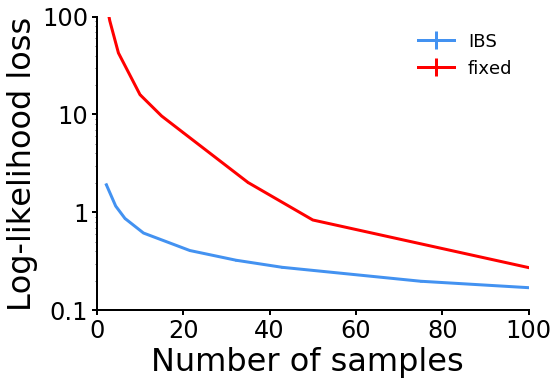

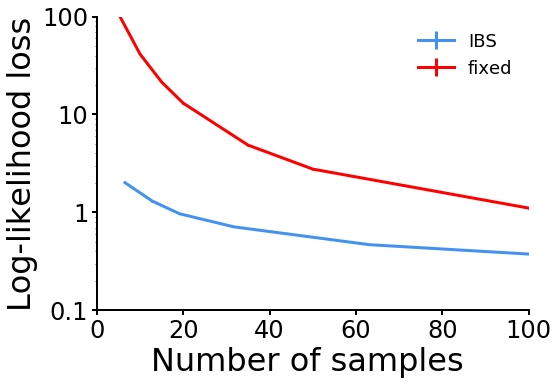

In [68]:
plot_loglik_loss('psycho')
plot_loglik_loss('vstm')

for model in models:
    plot_absdevs(model)
